In [2]:
%cd ..

/Users/juansegundohevia/Documents/RiceMDS/ELEC542/project


/Users/juansegundohevia/Documents/RiceMDS/ELEC542/project/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [67]:
import utils
import palette_analysis as pa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle as pkl
import pandas as pd
from tqdm import tqdm
import seaborn as sns

DATA_PATH = "data/test-MagicBrush"
RESULTS_PATH = "results"

```python
data = pa.PaletteAnalysis(img_path=DATA_PATH, results_path=RESULTS_PATH,
                          results_summary_path=os.path.join(RESULTS_PATH, "results-FINAL.json"))

# save the data object
with open(os.path.join("data", "palette_analysis.pkl"), "wb") as f:
    pkl.dump(data, f)

```python

metrics = []

for idx in tqdm(range(data.results.shape[0])):
    _m = data.compute_metric(idx)
    metrics.append(_m)

```python

METRIC_NAMES = ["saturation", "colorfulness", "brightness", "contrast"]

# process the metrics dictionaries and open them up into a singel dataframe
row_data = []
for idx, m in enumerate(metrics):
    for key in ["generated", "original"]:
        for met in METRIC_NAMES:
            row_data.append({
                "idx" : idx,
                "img_type": key,
                "metric": met,
                "value": m[key][met]
            })

metrics_df = pd.DataFrame(row_data)


```python
metrics_df = metrics_df.merge(data.results, left_on="idx", right_index=True)

```python
with open(os.path.join("data", "metrics_df.pkl"), "wb") as f:
    pkl.dump(metrics_df, f)

In [ ]:
with open("data/palette_analysis.pkl", "rb") as f:
    data : pa.PaletteAnalysis = pkl.load(f)

In [5]:
with open("data/metrics_df.pkl", "rb") as f:
    metrics_df = pkl.load(f)

In [78]:
data.results.sort_values("image_id").image_id.nunique()

100

In [8]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     8000 non-null   int64  
 1   img_type                8000 non-null   object 
 2   metric                  8000 non-null   object 
 3   value                   8000 non-null   float64
 4   path                    8000 non-null   object 
 5   prompt                  8000 non-null   object 
 6   image_path              8000 non-null   object 
 7   image_id                8000 non-null   object 
 8   prompt_type             8000 non-null   object 
 9   evaluation_dataset_idx  8000 non-null   int64  
 10  edit                    8000 non-null   object 
 11  palette                 8000 non-null   object 
 12  dominant_color          8000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 812.6+ KB


In [9]:
metrics_df.edit = metrics_df.edit.str.replace("Adjust the colors of this scene to be", "")

In [10]:
metrics_df.head(1)

,idx,img_type,metric,value,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx,edit,palette,dominant_color
0,0,generated,saturation,0.486199,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"


In [11]:
metrics_df[metrics_df.metric == "colorfulness"].value.describe()

count    2000.000000
mean      133.176185
std        35.077997
min         0.000000
25%       111.761824
50%       137.397520
75%       160.455008
max       188.039666
Name: value, dtype: float64

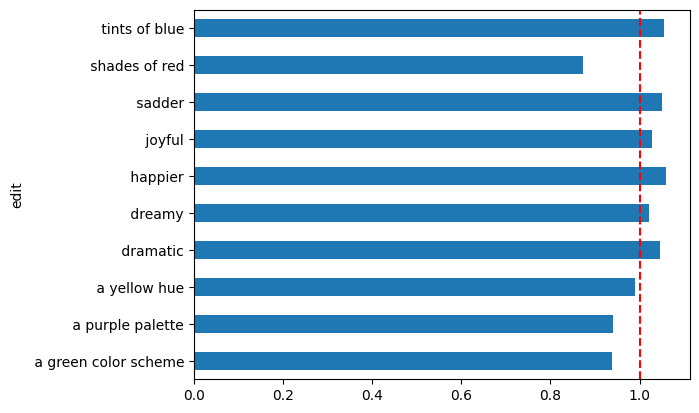

In [12]:
(metrics_df[metrics_df.metric == "colorfulness"].groupby("edit").value.mean() / metrics_df[metrics_df.metric == "colorfulness"].value.mean())\
    .plot(kind="barh")

plt.axvline(1, color="red", linestyle="--")

In [19]:
metrics_df.head()

,idx,img_type,metric,value,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx,edit,palette,dominant_color
0,0,generated,saturation,0.486199,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"
1,0,generated,colorfulness,105.546398,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"
2,0,generated,brightness,0.392919,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"
3,0,generated,contrast,0.325029,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"
4,0,original,saturation,0.097778,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5,shades of red,"[[56, 12, 17], [209, 195, 194], [121, 29, 37],...","[215, 203, 202]"


In [20]:
metrics_df.drop_duplicates(["idx", "metric"]).shape, metrics_df.shape

((4000, 13), (8000, 13))

In [54]:
# convert to q wide dataframe, using the "metric" as the column name and the "value" as the actual value
# keep the index level to be the "idx"

wide_df = metrics_df[metrics_df.img_type == "generated"].pivot(index=["idx", "img_type", "prompt_type", "edit", "image_path"], columns="metric", values="value").reset_index()
# rename current index to be "index"
wide_df = wide_df.rename_axis("index", axis=1).rename(columns={"idx": "gen_job_idx"})
wide_df.info()

wide_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen_job_idx   1000 non-null   int64  
 1   img_type      1000 non-null   object 
 2   prompt_type   1000 non-null   object 
 3   edit          1000 non-null   object 
 4   image_path    1000 non-null   object 
 5   brightness    1000 non-null   float64
 6   colorfulness  1000 non-null   float64
 7   contrast      1000 non-null   float64
 8   saturation    1000 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


index,gen_job_idx,img_type,prompt_type,edit,image_path,brightness,colorfulness,contrast,saturation
0,0,generated,color,shades of red,test/images/242679/242679-input.png,0.392919,105.546398,0.325029,0.486199
1,1,generated,color,tints of blue,test/images/242679/242679-input.png,0.532033,136.537096,0.263623,0.564029
2,2,generated,color,a purple palette,test/images/242679/242679-input.png,0.462768,176.471571,0.303454,0.223604
3,3,generated,color,a green color scheme,test/images/242679/242679-input.png,0.529891,117.710156,0.277499,0.435666
4,4,generated,color,a yellow hue,test/images/242679/242679-input.png,0.639303,126.012921,0.263927,0.824182


In [62]:
# add original images
orig_df = metrics_df[metrics_df.img_type == "original"].pivot(index=["idx", "img_type", "prompt_type", "edit", "image_path"], columns="metric", values="value").reset_index()
orig_df.drop_duplicates("image_path", inplace=True)
orig_df.rename(columns={"idx": "orig_job_idx"}, inplace=True)
# replace propmt type and edit with nulls
orig_df["prompt_type"] = None
orig_df["edit"] = None


orig_df.info()
orig_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 495
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   orig_job_idx  100 non-null    int64  
 1   img_type      100 non-null    object 
 2   prompt_type   0 non-null      object 
 3   edit          0 non-null      object 
 4   image_path    100 non-null    object 
 5   brightness    100 non-null    float64
 6   colorfulness  100 non-null    float64
 7   contrast      100 non-null    float64
 8   saturation    100 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 7.8+ KB


metric,orig_job_idx,img_type,prompt_type,edit,image_path,brightness,colorfulness,contrast,saturation
0,0,original,None,None,test/images/242679/242679-input.png,0.492598,186.612259,0.293066,0.097778
5,5,original,None,None,test/images/368667/368667-input.png,0.483468,160.393282,0.252992,0.543395
10,10,original,None,None,test/images/385042/385042-input.png,0.237351,120.090837,0.230340,0.288184
15,15,original,None,None,test/images/483348/483348-input.png,0.204289,105.296517,0.192873,0.476050
20,20,original,None,None,test/images/141946/141946-input.png,0.473697,144.648270,0.243533,0.162975


In [63]:
wide_df.shape, orig_df.shape

((1000, 9), (100, 9))

In [64]:
# concatenate
final_df = pd.concat([wide_df, orig_df], ignore_index=True, axis=0)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen_job_idx   1000 non-null   float64
 1   img_type      1100 non-null   object 
 2   prompt_type   1000 non-null   object 
 3   edit          1000 non-null   object 
 4   image_path    1100 non-null   object 
 5   brightness    1100 non-null   float64
 6   colorfulness  1100 non-null   float64
 7   contrast      1100 non-null   float64
 8   saturation    1100 non-null   float64
 9   orig_job_idx  100 non-null    float64
dtypes: float64(6), object(4)
memory usage: 86.1+ KB


In [89]:
METRICS = ["colorfulness", "contrast" , "saturation", "brightness"]

In [93]:
variations_df = wide_df.merge(orig_df.drop(columns=["orig_job_idx", "img_type", "prompt_type", "edit"]), on="image_path", how="inner", suffixes=("_gen", "_orig"))

for metric in METRICS:
    variations_df[f"diff_{metric}"] = variations_df[f"{metric}_gen"] - variations_df[f"{metric}_orig"]
    variations_df[f"diff_pct_{metric}"] = variations_df[f"diff_{metric}"] / variations_df[f"{metric}_orig"]

variations_df.info()
variations_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gen_job_idx            1000 non-null   int64  
 1   img_type               1000 non-null   object 
 2   prompt_type            1000 non-null   object 
 3   edit                   1000 non-null   object 
 4   image_path             1000 non-null   object 
 5   brightness_gen         1000 non-null   float64
 6   colorfulness_gen       1000 non-null   float64
 7   contrast_gen           1000 non-null   float64
 8   saturation_gen         1000 non-null   float64
 9   brightness_orig        1000 non-null   float64
 10  colorfulness_orig      1000 non-null   float64
 11  contrast_orig          1000 non-null   float64
 12  saturation_orig        1000 non-null   float64
 13  diff_colorfulness      1000 non-null   float64
 14  diff_pct_colorfulness  1000 non-null   float64
 15  diff_

,gen_job_idx,img_type,prompt_type,edit,image_path,brightness_gen,colorfulness_gen,contrast_gen,saturation_gen,brightness_orig,...,contrast_orig,saturation_orig,diff_colorfulness,diff_pct_colorfulness,diff_contrast,diff_pct_contrast,diff_saturation,diff_pct_saturation,diff_brightness,diff_pct_brightness
0,0,generated,color,shades of red,test/images/242679/242679-input.png,0.392919,105.546398,0.325029,0.486199,0.492598,...,0.293066,0.097778,-81.065862,-0.434408,0.031963,0.109065,0.388421,3.972461,-0.099679,-0.202354
1,1,generated,color,tints of blue,test/images/242679/242679-input.png,0.532033,136.537096,0.263623,0.564029,0.492598,...,0.293066,0.097778,-50.075163,-0.268338,-0.029442,-0.100463,0.466250,4.768442,0.039435,0.080055
2,2,generated,color,a purple palette,test/images/242679/242679-input.png,0.462768,176.471571,0.303454,0.223604,0.492598,...,0.293066,0.097778,-10.140688,-0.054341,0.010388,0.035447,0.125826,1.286846,-0.029830,-0.060556
3,3,generated,color,a green color scheme,test/images/242679/242679-input.png,0.529891,117.710156,0.277499,0.435666,0.492598,...,0.293066,0.097778,-68.902103,-0.369226,-0.015567,-0.053116,0.337887,3.455648,0.037292,0.075705
4,4,generated,color,a yellow hue,test/images/242679/242679-input.png,0.639303,126.012921,0.263927,0.824182,0.492598,...,0.293066,0.097778,-60.599338,-0.324734,-0.029139,-0.099428,0.726403,7.429085,0.146705,0.297818
5,5,generated,color,shades of red,test/images/368667/368667-input.png,0.343993,142.700992,0.269558,0.656105,0.483468,...,0.252992,0.543395,-17.692290,-0.110306,0.016566,0.065480,0.112710,0.207418,-0.139474,-0.288487
6,6,generated,color,tints of blue,test/images/368667/368667-input.png,0.502155,164.837211,0.258860,0.497745,0.483468,...,0.252992,0.543395,4.443929,0.027706,0.005868,0.023194,-0.045650,-0.084008,0.018687,0.038653
7,7,generated,color,a purple palette,test/images/368667/368667-input.png,0.454786,148.388122,0.237024,0.416463,0.483468,...,0.252992,0.543395,-12.005160,-0.074848,-0.015968,-0.063118,-0.126932,-0.233591,-0.028682,-0.059325
8,8,generated,color,a green color scheme,test/images/368667/368667-input.png,0.634648,100.373887,0.218944,0.828382,0.483468,...,0.252992,0.543395,-60.019395,-0.374201,-0.034048,-0.134581,0.284987,0.524457,0.151181,0.312701
9,9,generated,color,a yellow hue,test/images/368667/368667-input.png,0.690434,166.529710,0.245857,0.750555,0.483468,...,0.252992,0.543395,6.136428,0.038259,-0.007135,-0.028203,0.207160,0.381234,0.206966,0.428087


In [147]:
variations_df.edit = variations_df.edit.str.strip()

<Axes: xlabel='colorfulness', ylabel='img_type'>

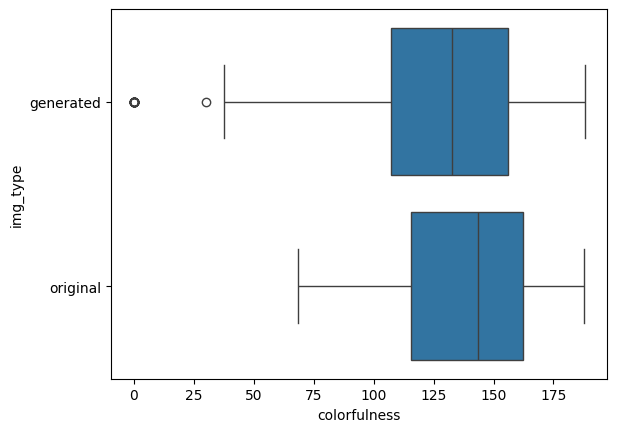

<Axes: xlabel='colorfulness', ylabel='prompt_type'>

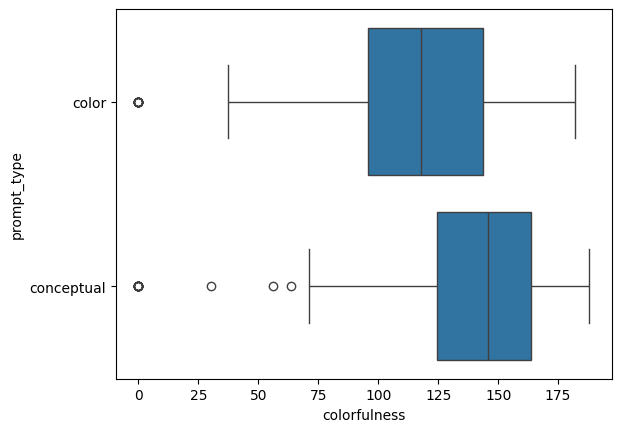

In [40]:
sns.boxplot(data=wide_df[wide_df.img_type == "generated"], x="colorfulness", y="prompt_type")

# Overview visuals

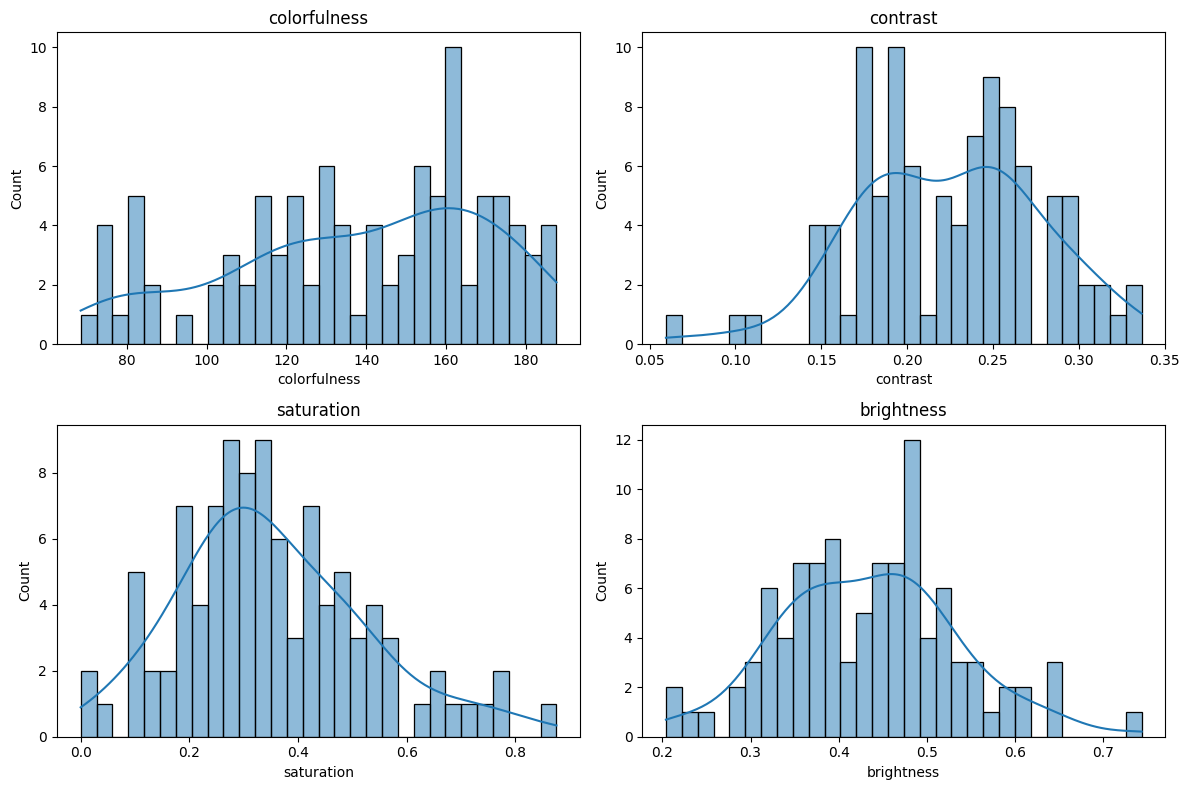

In [107]:
# plot distribution for metircs in the original dataset
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, metric in enumerate(METRICS):
    row_idx = i // 2
    col_idx = i % 2
    sns.histplot(data=orig_df, x=metric, ax=ax[row_idx][col_idx], bins=30, kde=True)
    ax[row_idx][col_idx].set_title(metric)

plt.tight_layout()


In [111]:
PT_PALETTE = {
    "conceptual": "tomato",
    "color": "gray",
}

IT_PALETTE = {
    "original": "gray",
    "generated" :"purple"
}

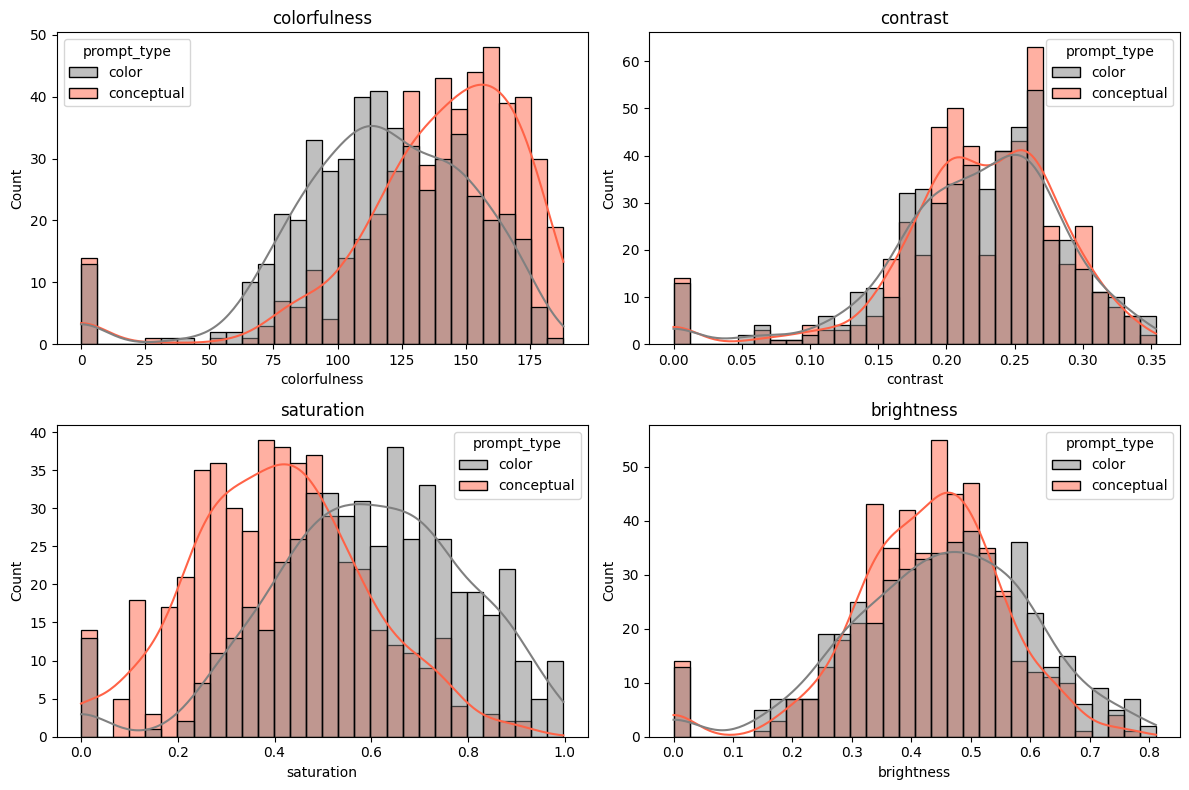

In [110]:
# plot distribution for metircs in the original dataset
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, metric in enumerate(METRICS):
    row_idx = i // 2
    col_idx = i % 2
    sns.histplot(data=final_df[final_df.img_type == "generated"],
                  x=metric, ax=ax[row_idx][col_idx], bins=30, kde=True,
                  hue="prompt_type", palette=PT_PALETTE)
    ax[row_idx][col_idx].set_title(metric)

plt.tight_layout()


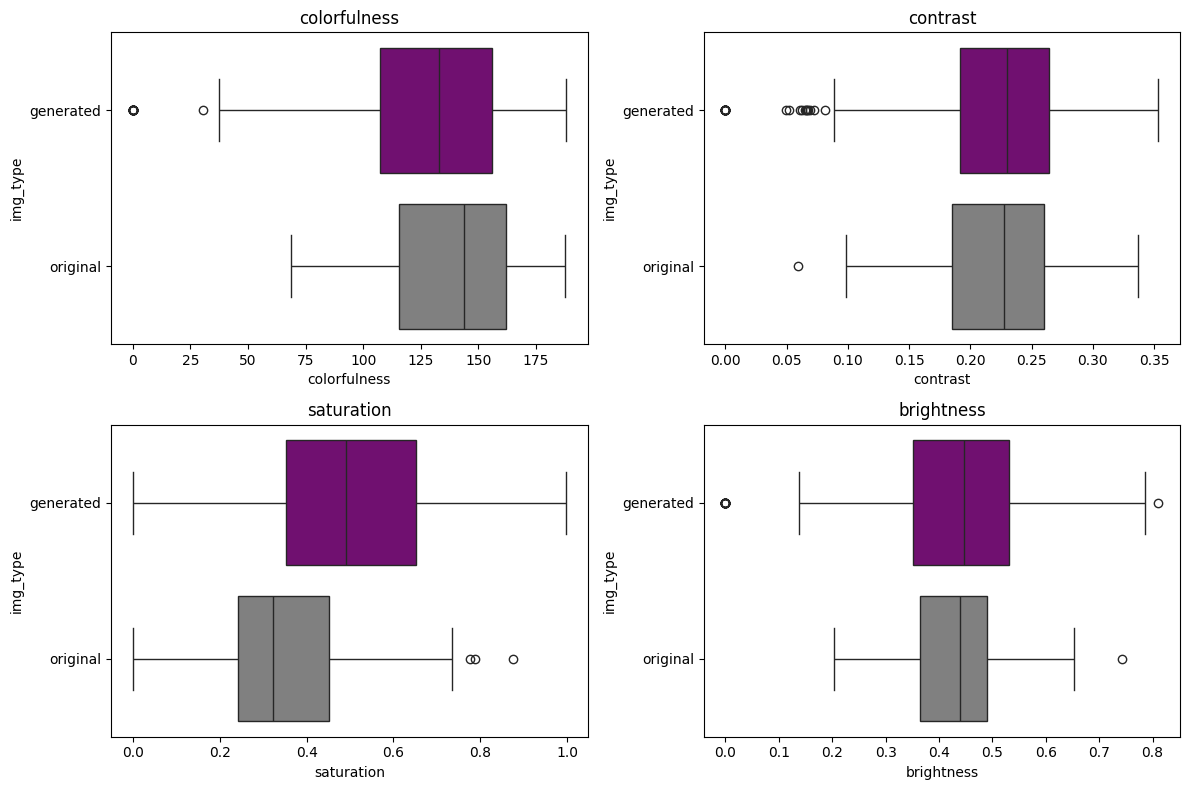

In [121]:
# plot distribution for metircs in the original dataset
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i, metric in enumerate(METRICS):
    row_idx = i // 2
    col_idx = i % 2
    sns.boxplot(data=final_df,
                  x=metric, y="img_type", ax=ax[row_idx][col_idx],
                  hue="img_type", palette=IT_PALETTE)
    ax[row_idx][col_idx].set_title(metric)

plt.tight_layout()


# Individual modification plots

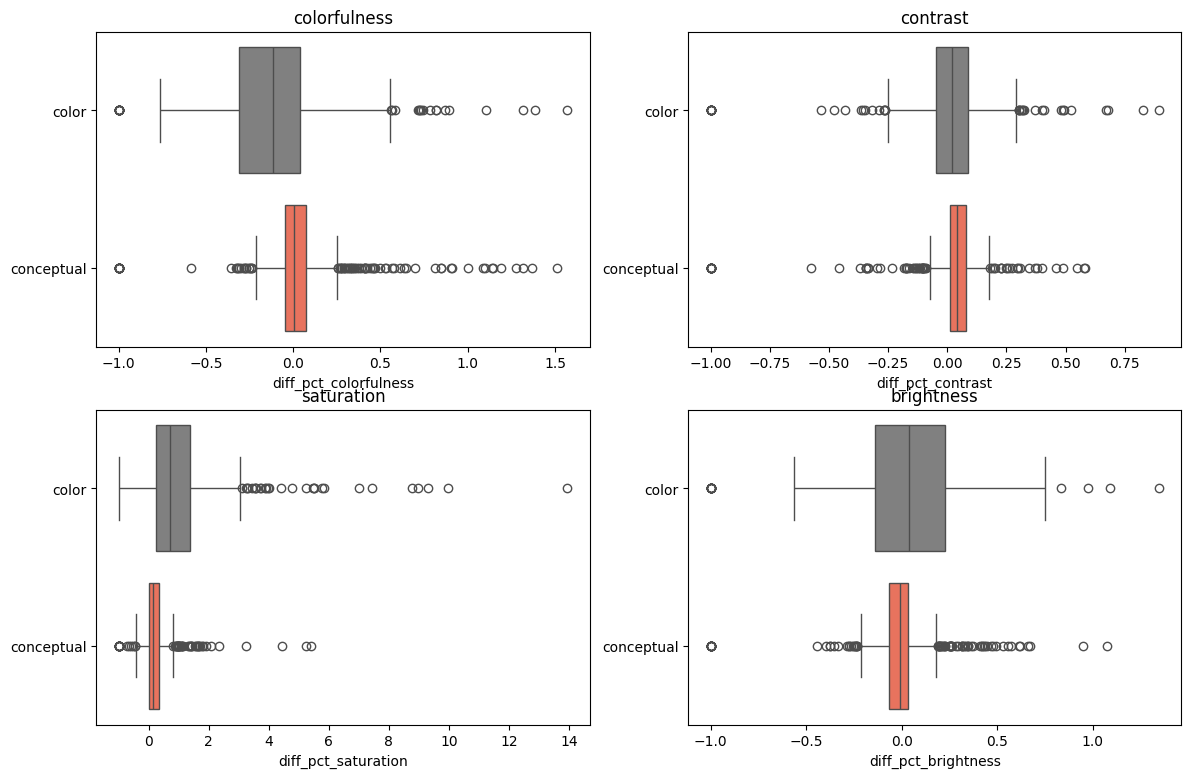

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for i, metric in enumerate(METRICS):
    row_idx = i // 2
    col_idx = i % 2
    sns.boxplot(data=variations_df,
                  x=f"diff_pct_{metric}", y="prompt_type", ax=ax[row_idx][col_idx],
                  hue="prompt_type", palette=PT_PALETTE)
    ax[row_idx][col_idx].set_title(metric)
    ax[row_idx][col_idx].set_ylabel("")

In [152]:
# generate a palette for each edit in the COLOR and CONCEPTUAL PROMPTS
# use matplotlib to generate a color palette
EDIT_PALETTE ={
  "color": {
    "shades of red": "#FF0000",
    "tints of blue": "#007BFF",
    "a purple palette": "#800080",
    "a green color scheme": "#00FF00",
    "a yellow hue": "#FFFF00"
  },
  "conceptual": {
    "sadder": "#5C5C8A",   # Dull purple-gray for sadness
    "happier": "#FFBB33",  # Bright yellow-orange for happiness
    "dramatic": "#FF6F61", # Coral for intensity and emotion
    "joyful": "#6FCF97",   # Mint green for uplifting joy
    "dreamy": "#9AAEDC"    # Lavender blue for a dreamy tone
  }
}

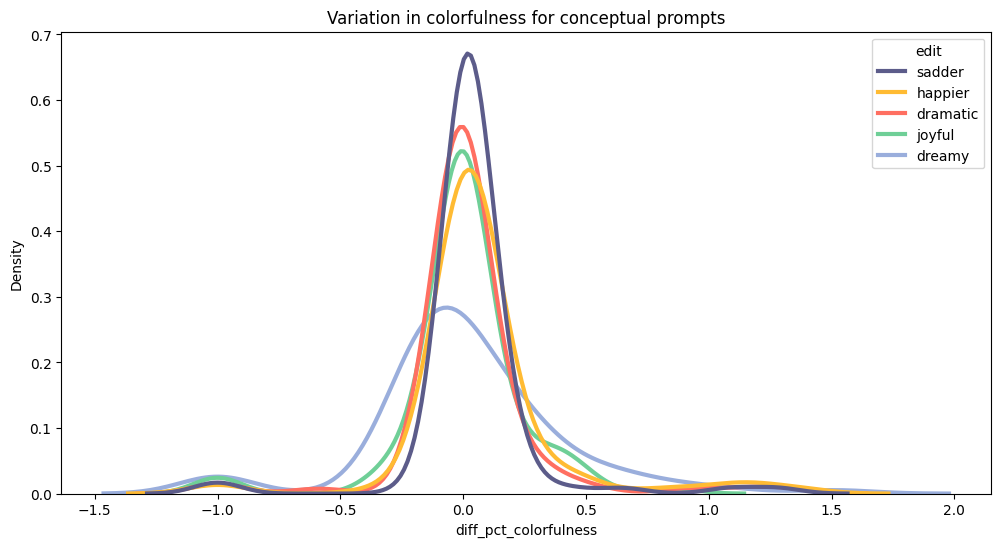

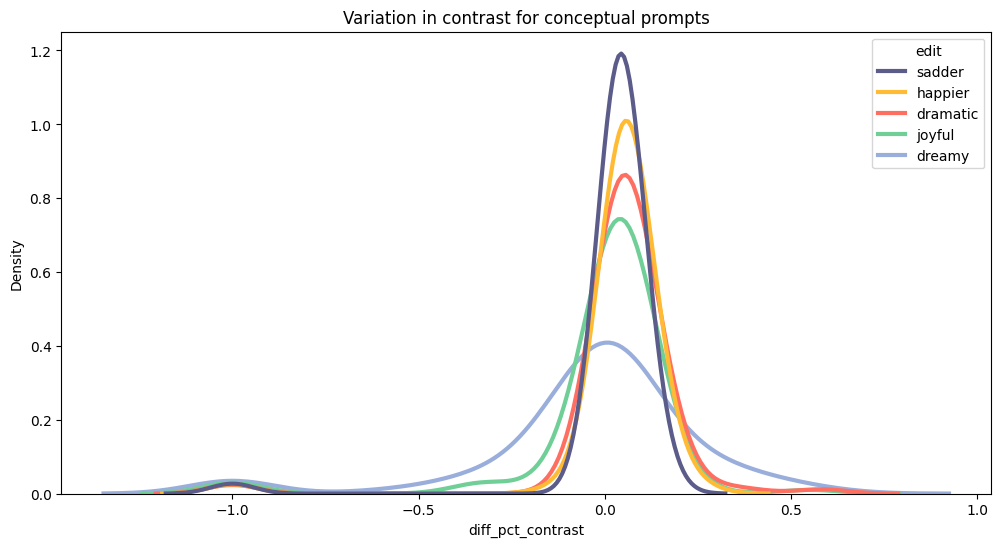

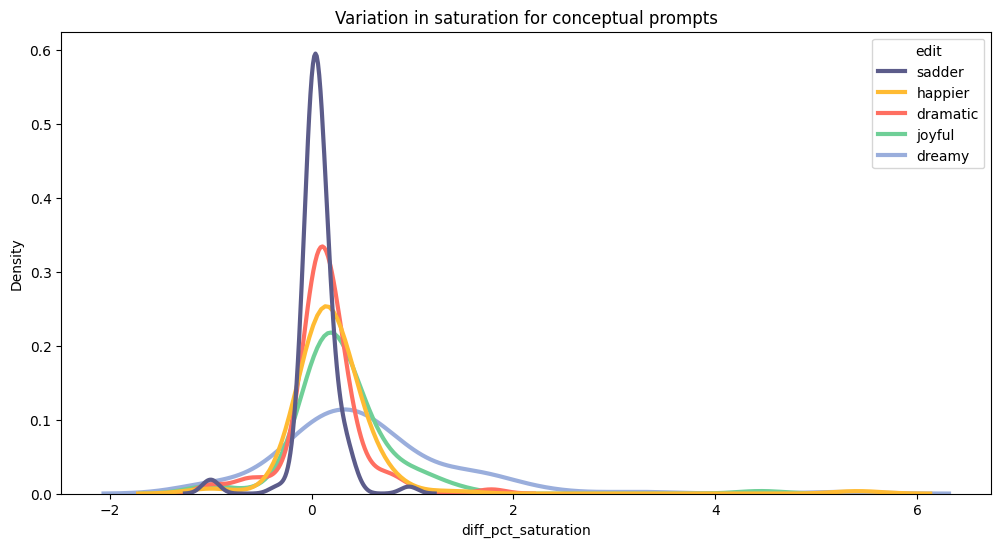

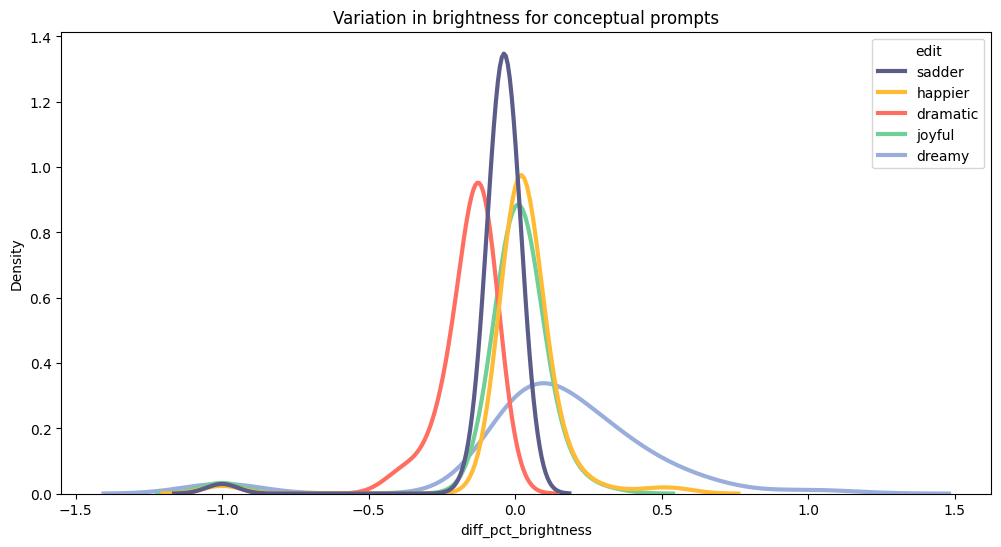

In [153]:
for tgt_metric in METRICS:

    fig, ax = plt.subplots(1,1, figsize=(12,6))

    # plot variation in colorfulness for all conceptual prompts as KDE plot
    sns.kdeplot(data=variations_df[variations_df.prompt_type == "conceptual"], x=f"diff_pct_{tgt_metric}",
                hue="edit", ax=ax, palette=EDIT_PALETTE["conceptual"], lw=3)


    ax.set_title(f"Variation in {tgt_metric} for conceptual prompts")

    plt.show()

- `dreamy` edits seem to provoke the most change
- `dramatic` edits reduce brightness the most
- `joyful` edits don't seem to make any significant changes

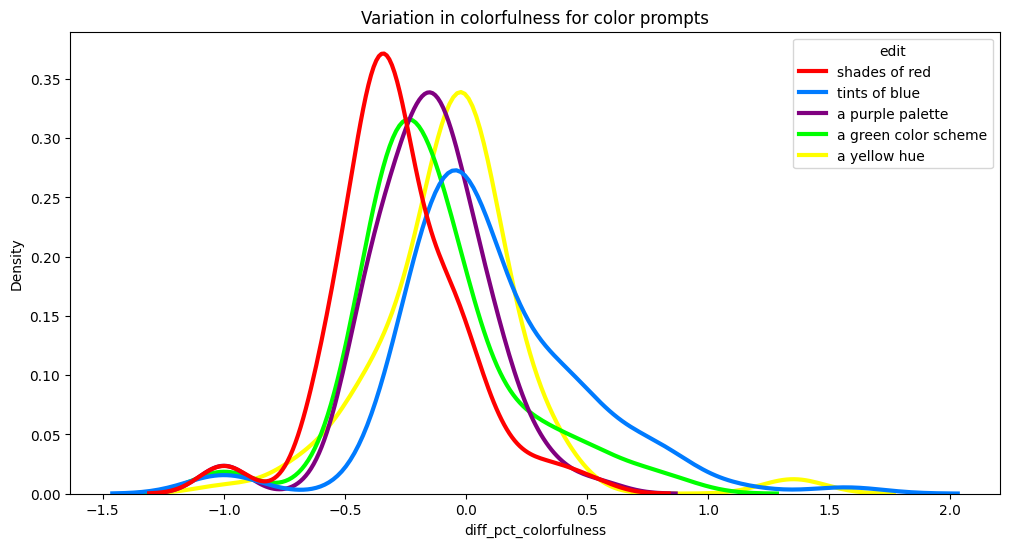

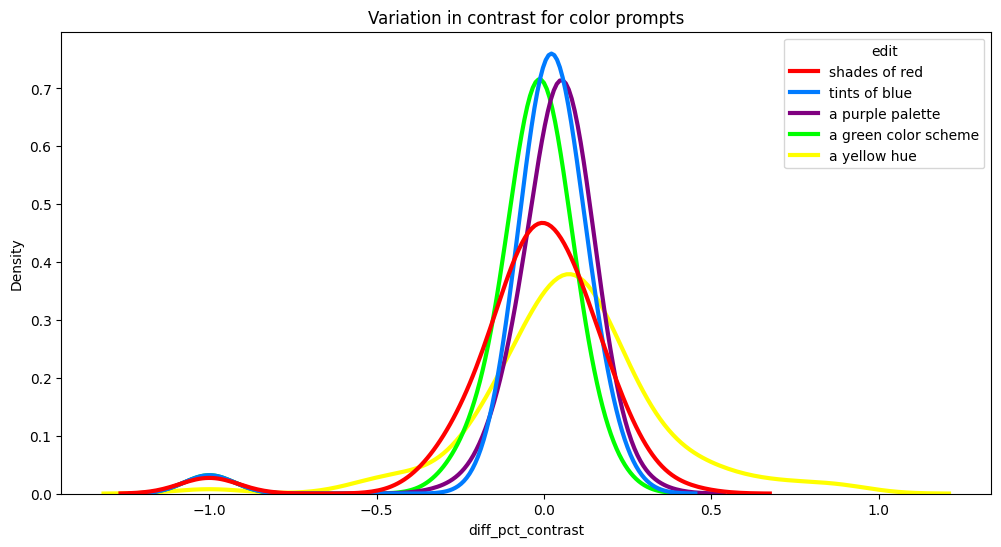

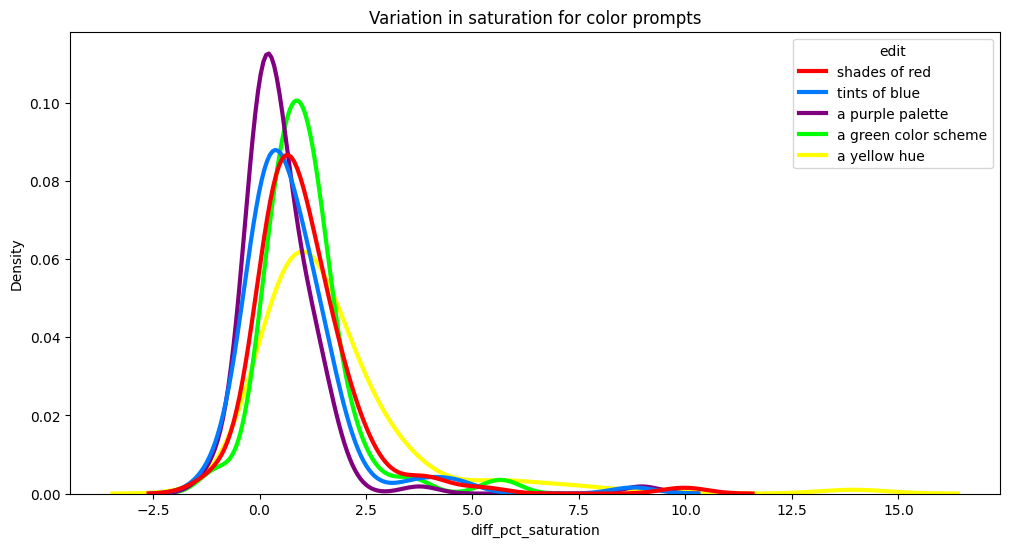

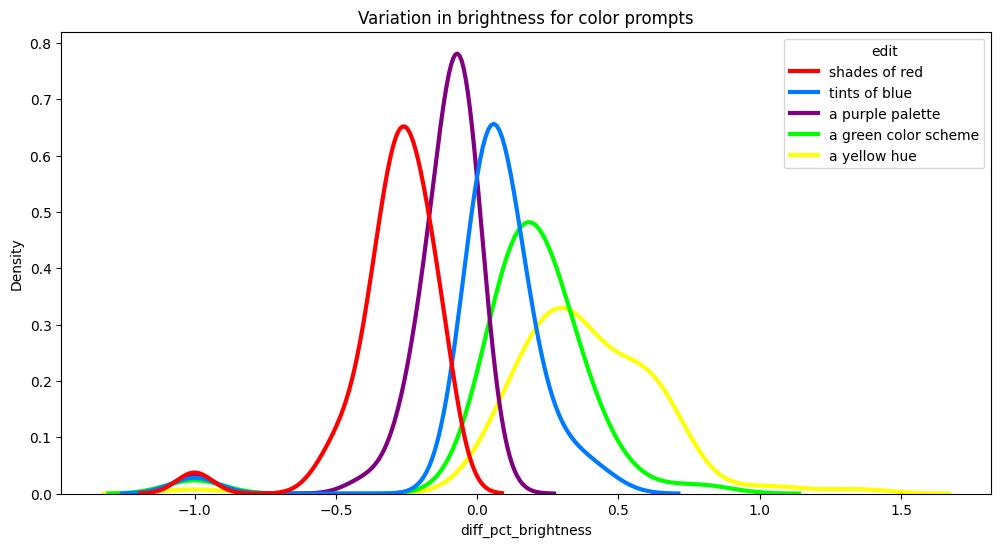

In [154]:
for tgt_metric in METRICS:

    fig, ax = plt.subplots(1,1, figsize=(12,6))

    # plot variation in colorfulness for all color prompts as KDE plot
    sns.kdeplot(data=variations_df[variations_df.prompt_type == "color"], x=f"diff_pct_{tgt_metric}",
                hue="edit", ax=ax, palette=EDIT_PALETTE["color"], lw=3)


    ax.set_title(f"Variation in {tgt_metric} for color prompts")

    plt.show()

# Visualize images

ID = 633


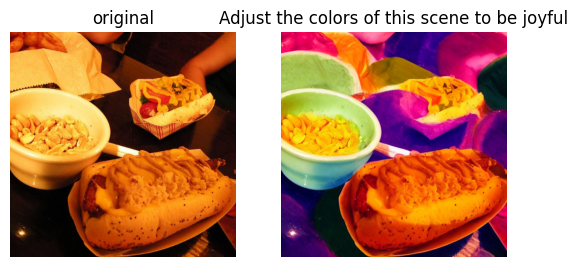

In [286]:
_id = variations_df[variations_df.edit == "joyful"].sample().gen_job_idx.values[0]
print(f"ID = {_id}")
data.plot_observation(_id, add_edit=True, add_original=True)

**happier**

ID = 881 is a funny example of the content being modified

**dreamy**

ID = 719
ID = 609
ID = 579
ID = 949

**sadder**

no significant variations at all

**dramatic**

ID = 787
ID = 932
ID = 767

**joyful**

ID = 803
ID = 983
ID = 553
ID = 758
